In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the cleaned data CSV
data ='C:\\Users\\PMLS\\Desktop\\Sentiment_analysis\\Data\\Text.csv'
df = pd.read_csv(data)

# Display the first few rows of the data
df.head()


,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
# Rename Columns 
df.rename(columns={'text': 'Text', 'label': 'Label'}, inplace=True)

In [5]:
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [6]:
# Lets Rename Label also {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
df['Label'] = df['Label'].replace(0,'Sadness')
df['Label'] = df['Label'].replace(1,'Joy')
df['Label'] = df['Label'].replace(2,'Love')
df['Label'] = df['Label'].replace(3,'Anger')
df['Label'] = df['Label'].replace(4,'Fear')
df['Label'] = df['Label'].replace(5,'Surprise')

In [7]:
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,Fear
1,ive enjoyed being able to slouch about relax a...,Sadness
2,i gave up my internship with the dmrg and am f...,Fear
3,i dont know i feel so lost,Sadness
4,i am a kindergarten teacher and i am thoroughl...,Fear


In [8]:
df.shape

(416809, 2)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_5468\297425486.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")


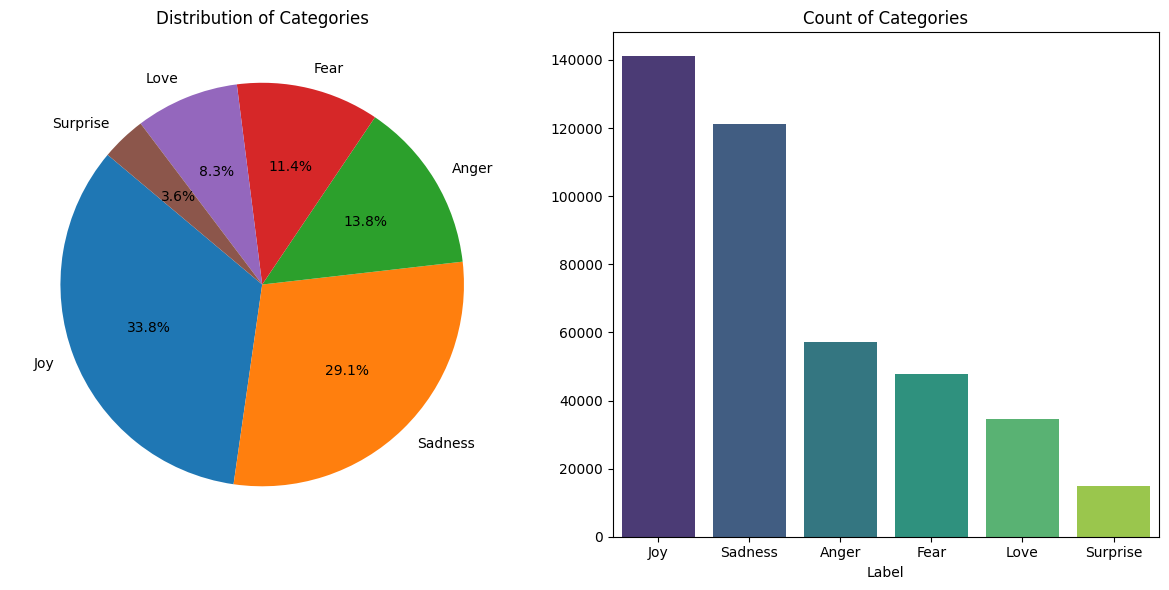

In [9]:
# Value Count Of Label
count = df['Label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()
plt.show()

In [10]:
#Make Seperate Data Set to Visualize text 
# Sadness
df_sadness = df[df['Label']=='Sadness']
# Joy
df_joy = df[df['Label']=='Joy']
# Love
df_love = df[df['Label']=='Love']
# Anger
df_anger = df[df['Label']=='Anger']
# Fear
df_fear = df[df['Label']=='Fear']
# Surprise
df_surprise = df[df['Label']=='Surprise']

In [25]:
! pip install wordcloud


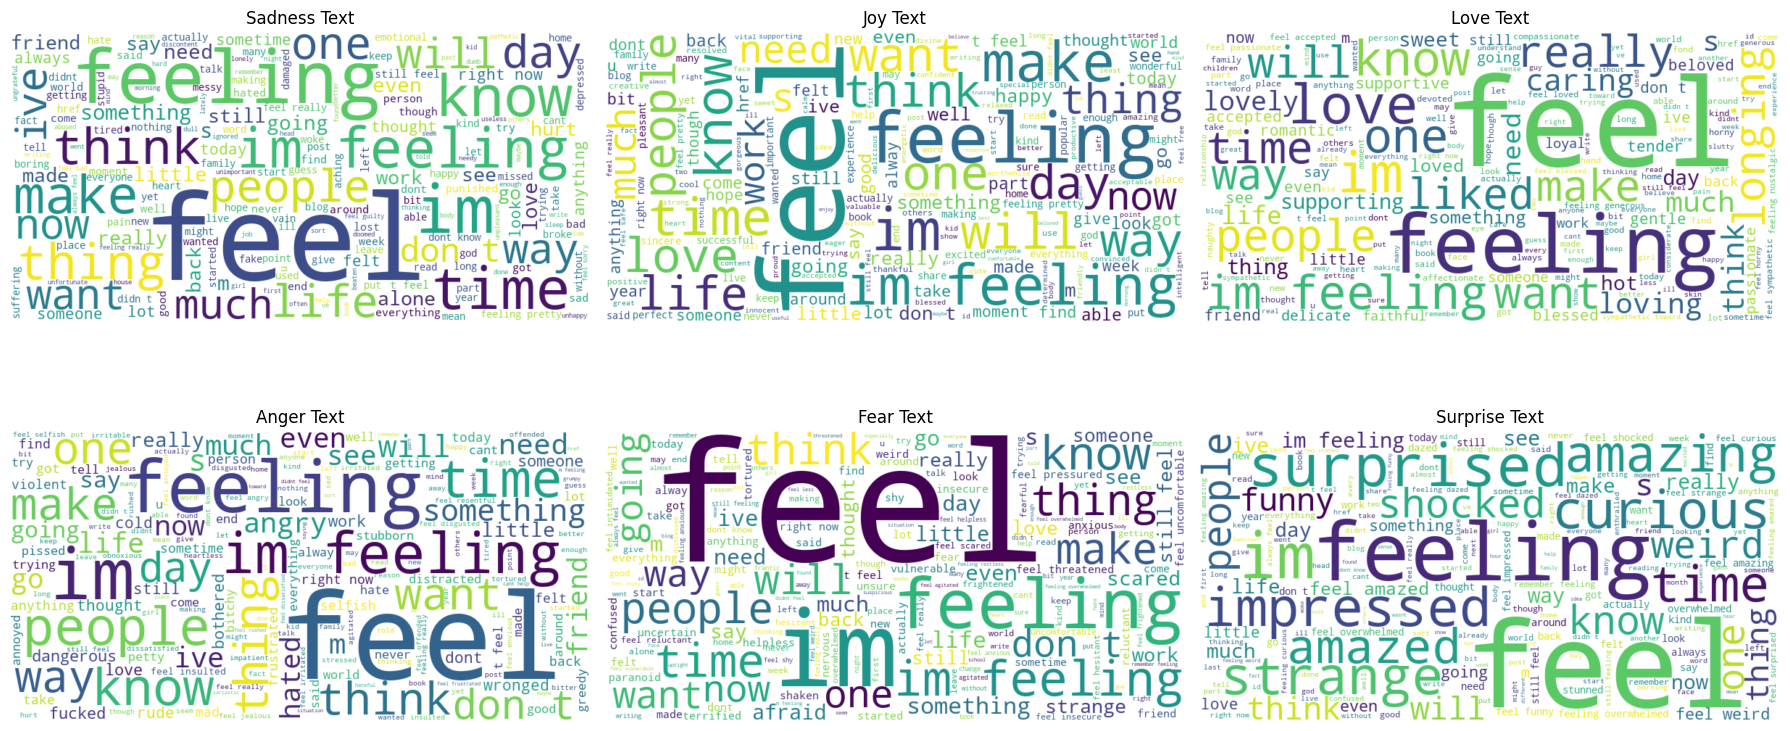

In [11]:

import wordcloud
from wordcloud import WordCloud
# Combine text from different categories
combined_sadness_text = ' '.join(df_sadness['Text'])
combined_joy_text = ' '.join(df_joy['Text'])
combined_love_text = ' '.join(df_love['Text'])
combined_anger_text = ' '.join(df_anger['Text'])
combined_fear_text = ' '.join(df_fear['Text'])
combined_surprise_text = ' '.join(df_surprise['Text'])

# Create word clouds
sadness_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_sadness_text)
joy_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_joy_text)
love_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_love_text)
anger_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_anger_text)
fear_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_fear_text)
surprise_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_surprise_text)

# Plot the word clouds
plt.figure(figsize=(18, 9))

plt.subplot(2, 3, 1)
plt.imshow(sadness_wordcloud, interpolation='bilinear')
plt.title('Sadness Text')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(joy_wordcloud, interpolation='bilinear')
plt.title('Joy Text')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(love_wordcloud, interpolation='bilinear')
plt.title('Love Text')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(anger_wordcloud, interpolation='bilinear')
plt.title('Anger Text')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(fear_wordcloud, interpolation='bilinear')
plt.title('Fear Text')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(surprise_wordcloud, interpolation='bilinear')
plt.title('Surprise Text')
plt.axis('off')

plt.tight_layout()
plt.show()

In [12]:
import sklearn


In [14]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'text' is the column with tweet content, 
# and 'label' is the column with emotion labels.

X = df['Text']  # Tweets (features)
y = df['Label']  # Emotion labels (target)

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the split size
print(f"Training data size: {len(X_train)}")
print(f"Testing data size: {len(X_test)}")


Training data size: 333447
Testing data size: 83362


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = vectorizer.transform(X_test)

# Check the shape of the resulting TF-IDF matrices
print(f"Training data shape: {X_train_tfidf.shape}")  # Should show (num_train_samples, num_features)
print(f"Testing data shape: {X_test_tfidf.shape}")   # Should show (num_test_samples, num_features)


Training data shape: (333447, 5000)
Testing data shape: (83362, 5000)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')

# Train the model
model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred))


c:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

       Anger       0.90      0.91      0.91     11441
        Fear       0.85      0.85      0.85      9594
         Joy       0.91      0.93      0.92     28164
        Love       0.81      0.77      0.79      6929
     Sadness       0.94      0.93      0.94     24201
    Surprise       0.78      0.71      0.74      3033

    accuracy                           0.90     83362
   macro avg       0.86      0.85      0.86     83362
weighted avg       0.90      0.90      0.90     83362



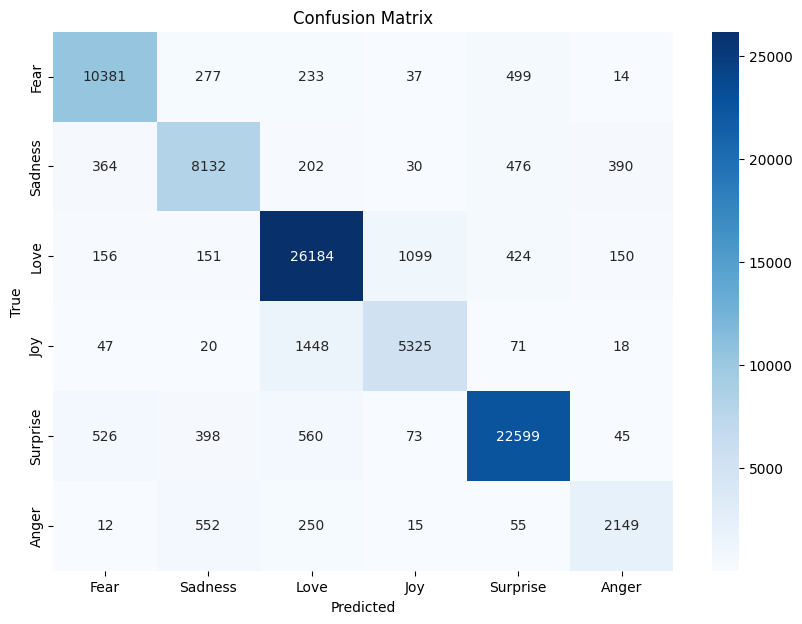

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['Label'].unique(), yticklabels=df['Label'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [21]:
import pandas as pd
import glob
import json

# Specify the folder path where your JSON files are located
json_files = glob.glob("C:\\Users\\PMLS\\Desktop\\Sentiment_analysis\\batches_results\\*.json") #Data after processing of LLM

# List to hold DataFrame pieces
df_list = []

# Read each JSON file and convert to DataFrame
for file in json_files:
    with open(file, 'r') as f:
        data = json.load(f)  # Load the JSON data
        df_list.append(pd.DataFrame(data))  # Convert to DataFrame and append

# Concatenate all DataFrames into one
df_combined = pd.concat(df_list, ignore_index=True)

# Check the first few rows to ensure it's loaded correctly
print(df_combined.head())


                                                text    label Sentiment
0      i just feel really helpless and heavy hearted     Fear  Negative
1  ive enjoyed being able to slouch about relax a...  Sadness  Negative
2  i gave up my internship with the dmrg and am f...     Fear  Negative
3                         i dont know i feel so lost  Sadness  Negative
4  i am a kindergarten teacher and i am thoroughl...     Fear  Negative


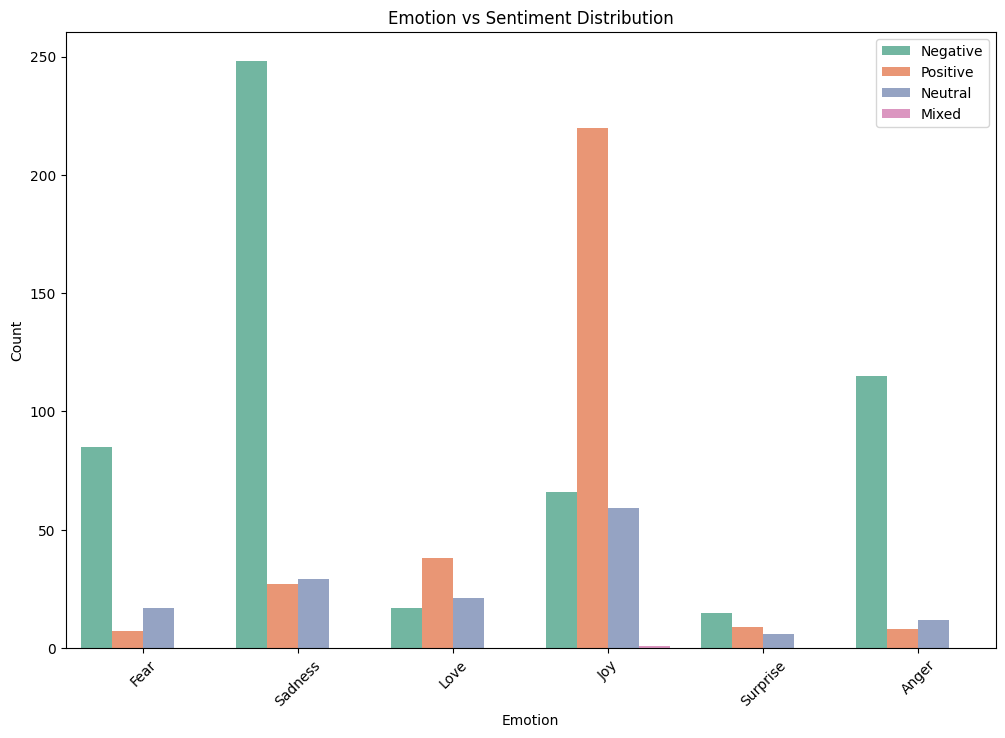

In [26]:
# Remove trailing punctuation from sentiment labels
df_combined['Sentiment'] = df_combined['Sentiment'].str.strip().str.title().str.replace(r'[^\w\s]', '', regex=True)

# Create the plot again
plt.figure(figsize=(12, 8))
sns.countplot(x='label', hue='Sentiment', data=df_combined, palette='Set2')

# Fix the legend manually
plt.title('Emotion vs Sentiment Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Get legend handles and labels and remove duplicates
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = list(dict.fromkeys(labels))  # Remove duplicate labels
unique_handles = [handles[labels.index(label)] for label in unique_labels]  # Get corresponding handles
plt.legend(unique_handles, unique_labels)

plt.show()


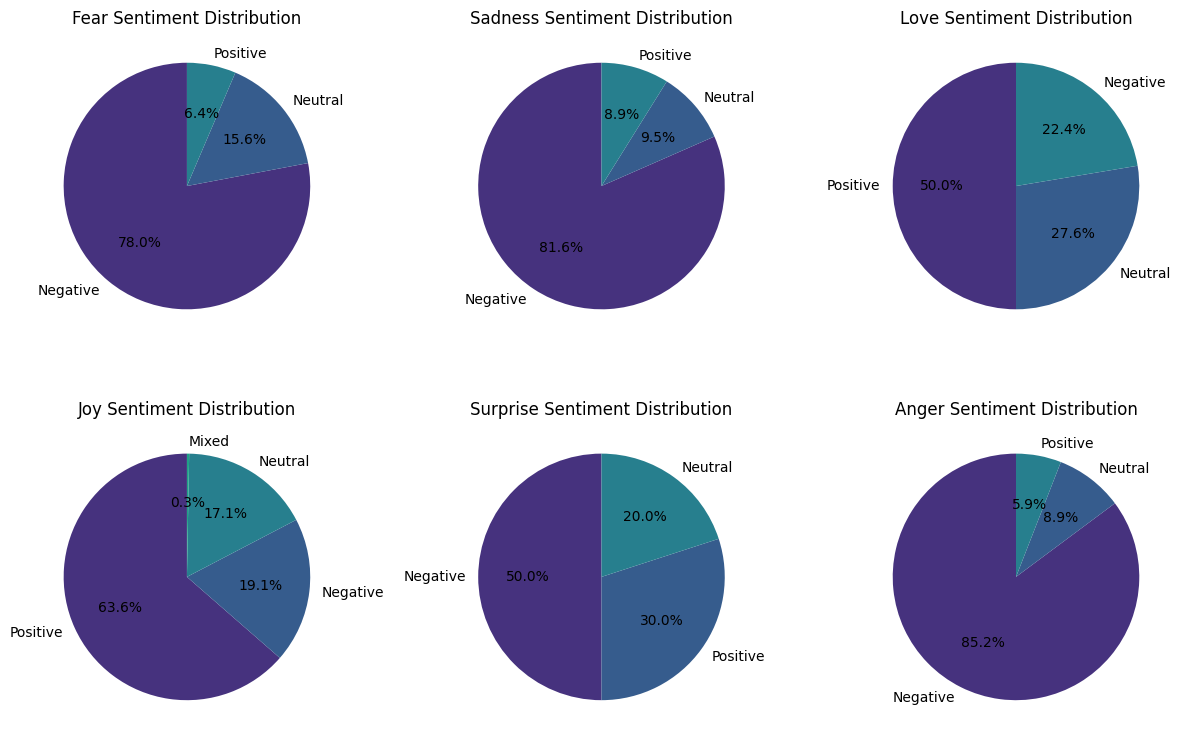

In [30]:
# Create pie charts for each emotion
emotion_labels = df_combined['label'].unique()

plt.figure(figsize=(12, 8))
for i, emotion in enumerate(emotion_labels):
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid of pie charts
    emotion_data = df_combined[df_combined['label'] == emotion]
    sentiment_counts = emotion_data['Sentiment'].value_counts()
    
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'{emotion} Sentiment Distribution')

plt.tight_layout()
plt.show()
